In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Thu Jul 14 16:12:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [4]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q "datasets==2.2.2" seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# !pip freeze

In [6]:
!rm -rf 'find -type d -name .ipynb_checkpoints'

In [7]:
!rmdir /content/dataset/test/img_dir/.ipynb_checkpoints
!rmdir /content/dataset-300dpi/test/annotation_dir/.ipynb_checkpoints
!rmdir /content/dataset/train/annotation_dir/.ipynb_checkpoints
!rmdir /content/dataset-300dpi/test/img_dir/.ipynb_checkpoints


!rmdir /content/dataset/test/.ipynb_checkpoints
!rmdir /content/dataset/train/.ipynb_checkpoints

rmdir: failed to remove '/content/dataset/test/img_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset-300dpi/test/annotation_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset/train/annotation_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset-300dpi/test/img_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset/test/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset/train/.ipynb_checkpoints': No such file or directory


In [8]:
from datasets import load_dataset 
# from PIL import Image
# this dataset uses the new Image feature :)
dataset = load_dataset('/content/dataset.py')

Generating train split: 0 examples [00:00, ? examples/s]

/content/dataset-300dpi/train/img_dir/10page-0.jpg
/content/dataset-300dpi/train/img_dir/16page-0.jpg
/content/dataset-300dpi/train/img_dir/17page-0.jpg
/content/dataset-300dpi/train/img_dir/18page-0.jpg
/content/dataset-300dpi/train/img_dir/19page-0.jpg
/content/dataset-300dpi/train/img_dir/1page-0.jpg
/content/dataset-300dpi/train/img_dir/20page-0.jpg
/content/dataset-300dpi/train/img_dir/21page-0.jpg
/content/dataset-300dpi/train/img_dir/22page-0.jpg
/content/dataset-300dpi/train/img_dir/23page-0.jpg
/content/dataset-300dpi/train/img_dir/24page-0.jpg
/content/dataset-300dpi/train/img_dir/25page-0.jpg
/content/dataset-300dpi/train/img_dir/26page-0.jpg
/content/dataset-300dpi/train/img_dir/27page-0.jpg
/content/dataset-300dpi/train/img_dir/28page-0.jpg
/content/dataset-300dpi/train/img_dir/29page-0.jpg
/content/dataset-300dpi/train/img_dir/2page-0.jpg
/content/dataset-300dpi/train/img_dir/31page-0.jpg
/content/dataset-300dpi/train/img_dir/32page-0.jpg
/content/dataset-300dpi/train/img

Generating test split: 0 examples [00:00, ? examples/s]

/content/dataset-300dpi/test/img_dir/11page-0.jpg
/content/dataset-300dpi/test/img_dir/12page-0.jpg
/content/dataset-300dpi/test/img_dir/13page-0.jpg
/content/dataset-300dpi/test/img_dir/14page-0.jpg
/content/dataset-300dpi/test/img_dir/15page-0.jpg
/content/dataset-300dpi/test/img_dir/51page-0.jpg
/content/dataset-300dpi/test/img_dir/52page-0.jpg
/content/dataset-300dpi/test/img_dir/53page-0.jpg
/content/dataset-300dpi/test/img_dir/54page-0.jpg
/content/dataset-300dpi/test/img_dir/55page-0.jpg
Dataset sroie downloaded and prepared to /root/.cache/huggingface/datasets/sroie/discharge/1.0.0/33c0e812e97bd20f58a82f16c03d075e2c6334758818201c7f524e3cf90a3882. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
dataset["train"].features

{'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'image_path': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=41, names=['others', 'produttore_key', 'produttore_value', 'cliente_key', 'cliente_value', 'unitloc_key', 'unitloc_value', 'operatore_key', 'operatore_value', 'referente_key', 'referente_value', 'cfproduttore_key', 'cfproduttore_value', 'telefono_key', 'telefono_value', 'emailcliente_key', 'emailcliente_value', 'datarichiesta_key', 'datarichiesta_value', 'orariorichiesta_key', 'orariorichiesta_value', 'emailproduttore_key', 'emailproduttore_value', 'mattina_key', 'mattina_value', 'pomeriggio_key', 'pomeriggio_value', 'cer_key', 'cer_value', 'descrizione_key', 'descrizione_value', 'sf_key', 'sf_value', 'classpericolo_key', 'classpericolo_value', 'destino_key', 'destino_value', 'confezionamento_key', 'confezionamento_value', 'destinazi

In [10]:
example = dataset["train"][1]
example["image_path"]

'/content/dataset-300dpi/train/img_dir/16page-0.jpg'

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 49
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 10
    })
})

In [12]:
# example = dataset["train"][0]
# example["image"]

In [13]:
words, bboxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(bboxes)
print(ner_tags)

['nan', 'nan', 'nan', 'nan', 'af', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', 'EUROCORPORATION', 'nan', 'PRODUTTORE', 'CONSORZIO', 'ELETTRA', 'SRL', 'CLIENTE', 'CONSORZIO', 'ELETTRA', 'SRL', 'nan', 'ps', 'C/O', 'SIFTE', 'BERTI', '-', 'VIA', 'SANDRO', 'PERTINI', '50', '50019', 'nan', 'Unit.', 'Loc.', 'SESTO', 'FIORENTINO', '(Fl)', 'Operatore', 'Alessandro', 'Barone', '-', 'Mob.', '335/5942201', 'nan', 'Referente', 'GIOVANNI', 'LO', 'NARDO', 'OK', 'CF', 'Produttore', '2093750970', 'nan', 'Telefono', '3315940525', 'Email', 'Cliente', 'p.gori@consorzioelettra.it', 'nan', 'Data', 'Richiesta', '23-02-2022', '|', 'Orario', 'richiesta', '07:00', 'Email', 'Produttore', '|', 'p.gori@consorzioelettra.it', 'nan', 'ZTL', 'oO', 'nan', 'Matt

In [14]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

In [15]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [16]:
print(label_list)

['others', 'produttore_key', 'produttore_value', 'cliente_key', 'cliente_value', 'unitloc_key', 'unitloc_value', 'operatore_key', 'operatore_value', 'referente_key', 'referente_value', 'cfproduttore_key', 'cfproduttore_value', 'telefono_key', 'telefono_value', 'emailcliente_key', 'emailcliente_value', 'datarichiesta_key', 'datarichiesta_value', 'orariorichiesta_key', 'orariorichiesta_value', 'emailproduttore_key', 'emailproduttore_value', 'mattina_key', 'mattina_value', 'pomeriggio_key', 'pomeriggio_value', 'cer_key', 'cer_value', 'descrizione_key', 'descrizione_value', 'sf_key', 'sf_value', 'classpericolo_key', 'classpericolo_value', 'destino_key', 'destino_value', 'confezionamento_key', 'confezionamento_value', 'destinazione_key', 'destinazione_value']


In [17]:
print(id2label)

{0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'cliente_key', 4: 'cliente_value', 5: 'unitloc_key', 6: 'unitloc_value', 7: 'operatore_key', 8: 'operatore_value', 9: 'referente_key', 10: 'referente_value', 11: 'cfproduttore_key', 12: 'cfproduttore_value', 13: 'telefono_key', 14: 'telefono_value', 15: 'emailcliente_key', 16: 'emailcliente_value', 17: 'datarichiesta_key', 18: 'datarichiesta_value', 19: 'orariorichiesta_key', 20: 'orariorichiesta_value', 21: 'emailproduttore_key', 22: 'emailproduttore_value', 23: 'mattina_key', 24: 'mattina_value', 25: 'pomeriggio_key', 26: 'pomeriggio_value', 27: 'cer_key', 28: 'cer_value', 29: 'descrizione_key', 30: 'descrizione_value', 31: 'sf_key', 32: 'sf_value', 33: 'classpericolo_key', 34: 'classpericolo_value', 35: 'destino_key', 36: 'destino_value', 37: 'confezionamento_key', 38: 'confezionamento_value', 39: 'destinazione_key', 40: 'destinazione_value'}


In [18]:
from PIL import Image

def prepare_examples(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']] #Image.open(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [19]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=label_list)),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [20]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 49
})

In [21]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> nan nan nan nan a nan nan nan EUROCORPORATION nan nan nan CONSULEN ZA E GE nan nan nan STIONE RIFIUTI nan nan nan wy nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan PRODUTTORE COMUNE DI PISTOIA CLIENTE COMUNE DI PISTOIA nan nan Unit. Loc. Via Dino Buzzati, 1 51100 PISTOIA (PT) Operatore Francesca Buffolino - Mob. 327 6613420 nan nan Referente Francesco Andreotti CF Produttore 108690470 nan nan Telefono 366/3488969 Email Cliente f.andreotti@comune. pistoia.it nan nan Data Richiesta 25-02-2022 | Orario richiesta 08:00 Email Produttore | f.andreotti@comune.pistoia.it nan ZTL | nan nan Mattina Dalle 08:00 Alle 13:00 PER LA L

In [22]:
train_dataset.set_format("torch")

In [23]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [24]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 10
})

In [25]:
eval_dataset.features['bbox']

Array2D(shape=(512, 4), dtype='int64', id=None)

In [26]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> nan nan nan nan as nan nan nan EUROCORPORATION nan nan nan CONS ULENZA E GESTIONE RIFIUTL nan nan nan ow nan nan nan id WAN OMAN PER UFFICIO nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan           nan   nan  nan nan nan PRODUTTORE COMUNE DI PISTOIA CLIENTE COMUNE DI PISTOIA nan nan Unit. Loc. Via Dino Buzzati, 1 51100 PISTOIA (PT) Operatore Francesca Buffolino - Mob. 327 6613420 nan nan Referente Francesco Andreotti CF Produttore 108690470 nan nan Telefono 366/3488969 Email Cliente f.andreotti@comune.pistoia.it nan nan Data Richiesta 25-02-2022 | Orario richiesta 08:00 Email Produttore | f.andreotti@comune.pistoia.it nan ORAR ZTL LC] nan nan Mattina Dalle 08:00 Alle 13:00 PER LA LOGISTICA: nan nan Pomeriggio | Dalle 14:30 Alle SCHEDA FATTA DA MATILDE nan nan nan  nan nan nan  nan nan nan CHIAMARE ALMENO DUE GIORNI PRIMA PER CONFERMA DATA E nan ORARIO nan nan DAL LUNEDi AL VENERDi 08:00 

In [27]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 nan 0
 nan 0
 nan 0
 nan 0
 a 0
 nan 0
 nan 0
 nan 0
 EUR 0
OC -100
OR -100
POR -100
ATION -100
 nan 0
 nan 0
 nan 0
 CONS 0
UL -100
EN -100
 Z 0
A -100
 E 0
 GE 0
 nan 0
 nan 0
 nan 0
 ST 0
ION -100
E -100
 R 0
IF -100
I -100
UT -100
I -100
 nan 0
 nan 0
 nan 0
 w 0
y -100
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 

In [28]:
from datasets import load_metric

metric = load_metric("seqeval")

In [29]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [30]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="layoutlmv3-finetuned-discharge",
                                  max_steps=1000,
                                  per_device_train_batch_size=5,
                                  per_device_eval_batch_size=5,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  no_cuda=False)

In [32]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [33]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 49
  Num Epochs = 100
  Instantaneous batch size per device = 5
  Total train batch size (w. parallel, distributed & accumulation) = 5
  Gradient Accumulation steps = 1
  Total optimization steps = 1000
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,0.483210,0.587432,0.541562,0.563565,0.911843
200,No log,0.143866,0.939547,0.939547,0.939547,0.991676
300,No log,0.071917,0.952381,0.957179,0.954774,0.993946
400,No log,0.050692,0.967172,0.964736,0.965952,0.995838
500,0.382100,0.042239,0.969620,0.964736,0.967172,0.995460
600,0.382100,0.036783,0.972222,0.969773,0.970996,0.996595
700,0.382100,0.035048,0.967172,0.964736,0.965952,0.995460
800,0.382100,0.031559,0.969773,0.969773,0.969773,0.996595
900,0.382100,0.030654,0.972362,0.974811,0.973585,0.995838
1000,0.044100,0.030621,0.972362,0.974811,0.973585,0.995838


***** Running Evaluation *****
  Num examples = 10
  Batch size = 5
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: cliente_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: cliente_value seems not to be NE tag.
  warnings.warn('{} seems not to be N

TrainOutput(global_step=1000, training_loss=0.21309427642822265, metrics={'train_runtime': 648.2545, 'train_samples_per_second': 7.713, 'train_steps_per_second': 1.543, 'total_flos': 1300949815603200.0, 'train_loss': 0.21309427642822265, 'epoch': 100.0})

In [34]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 10
  Batch size = 5
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: cliente_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: cliente_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeva

{'epoch': 100.0,
 'eval_accuracy': 0.9958380628074158,
 'eval_f1': 0.9735849056603774,
 'eval_loss': 0.030620787292718887,
 'eval_precision': 0.9723618090452262,
 'eval_recall': 0.9748110831234257,
 'eval_runtime': 0.7145,
 'eval_samples_per_second': 13.996,
 'eval_steps_per_second': 2.799}

In [35]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000")#/content/layoutlmv3-finetuned-invoice/checkpoint-2000

loading configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/config.json
Model config LayoutLMv3Config {
  "_name_or_path": "/content/layoutlmv3-finetuned-discharge/checkpoint-1000",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "produttore_key",
    "2": "produttore_value",
    "3": "cliente_key",
    "4": "cliente_value",
    "5": "unitloc_key",
    "6": "unitloc_value",
    "7": "operatore_key",
    "8": "operatore_value",
    "9": "referente_key",
    "10": "referente_value",
    "11": "cfproduttore_key",
    "12": "cfproduttore_value",
    "13": "telefono_key",
    "14": "telefono_value",
    "15": "emailcliente_

In [36]:
example = dataset["test"][0]
print(example.keys())

image = Image.open(example["image_path"])
words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt", truncation=True)
for k,v in encoding.items():
  print(k,v.shape)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
input_ids torch.Size([1, 512])
attention_mask torch.Size([1, 512])
bbox torch.Size([1, 512, 4])
labels torch.Size([1, 512])
pixel_values torch.Size([1, 3, 224, 224])


In [37]:
words

['nan',
 'nan',
 'nan',
 'nan',
 'as',
 'nan',
 'nan',
 'nan',
 'EUROCORPORATION',
 'nan',
 'nan',
 'nan',
 'CONS',
 'ULENZA',
 'E',
 'GESTIONE',
 'RIFIUTL',
 'nan',
 'nan',
 'nan',
 'ow',
 'nan',
 'nan',
 'nan',
 'id',
 'WAN',
 'OMAN',
 'PER',
 'UFFICIO',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 '          ',
 'nan',
 ' ',
 ' ',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 'PRODUTTORE',
 'COMUNE',
 'DI',
 'PISTOIA',
 'CLIENTE',
 'COMUNE',
 'DI',
 'PISTOIA',
 'nan',
 'nan',
 'Unit.',
 'Loc.',
 'Via',
 'Dino',
 'Buzzati,',
 '1',
 '51100',
 'PISTOIA',
 '(PT)',
 'Operatore',
 'Francesca',
 'Buffolino',
 '-',
 'Mob.',
 '327',
 '6613420',
 'nan',
 'nan',
 'Referente',
 'Francesco',
 'Andreotti',
 'CF',
 'Produttore',


In [38]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


torch.Size([1, 512, 41])
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 0, 0, 13, 23, 17, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 0, 0, 17, 17, 17, 18, 18, 18, 18, 18, 18, 0, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 23, 25, 0, 26, 26, 26, 26, 26, 26, 26, 0, 0,

In [39]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, 0, 0, 0, 0, 0, -100, -100, 0, 0, -100, -100, -100, 0, -100, -100, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, -100, 0, 0, -100, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, 1, -100, -100, -100, -100, 2, -100, 2, 2, -100, -100, -100, 3, -100, 4, -100, 4, 4, -100, -100, -100, 0, 0, 5, -100, 5, -100, 6, 6, 6, -100, -100, 6, 6, -100, 6, -100, -100, -100, 6, -100, -100, 7, -100, -100, 8, -100, 8, -100, -100, 8, 8, -100, 8, 8, -100, -100, 0, 0, 9, -100, -100, 10, -100, 10, -100, 11, 11, -100, -100, -100, 12, -100, -100, -100, 0, 0, 13, -100, -100, 14, -100, -100, -100, -100, 15, 15, -100, 16, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0, 0, 17, 17, -100, 18, -100, -100, -100, -100, -100, 0, 19, -100, 19, -100, 20, -100, -1

In [40]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

In [41]:
true_labels

['others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'produttore_key',
 'produttore_value',
 'produttore_value',
 'produttore_value',
 'cliente_key',
 'cliente_v

## prediction Value

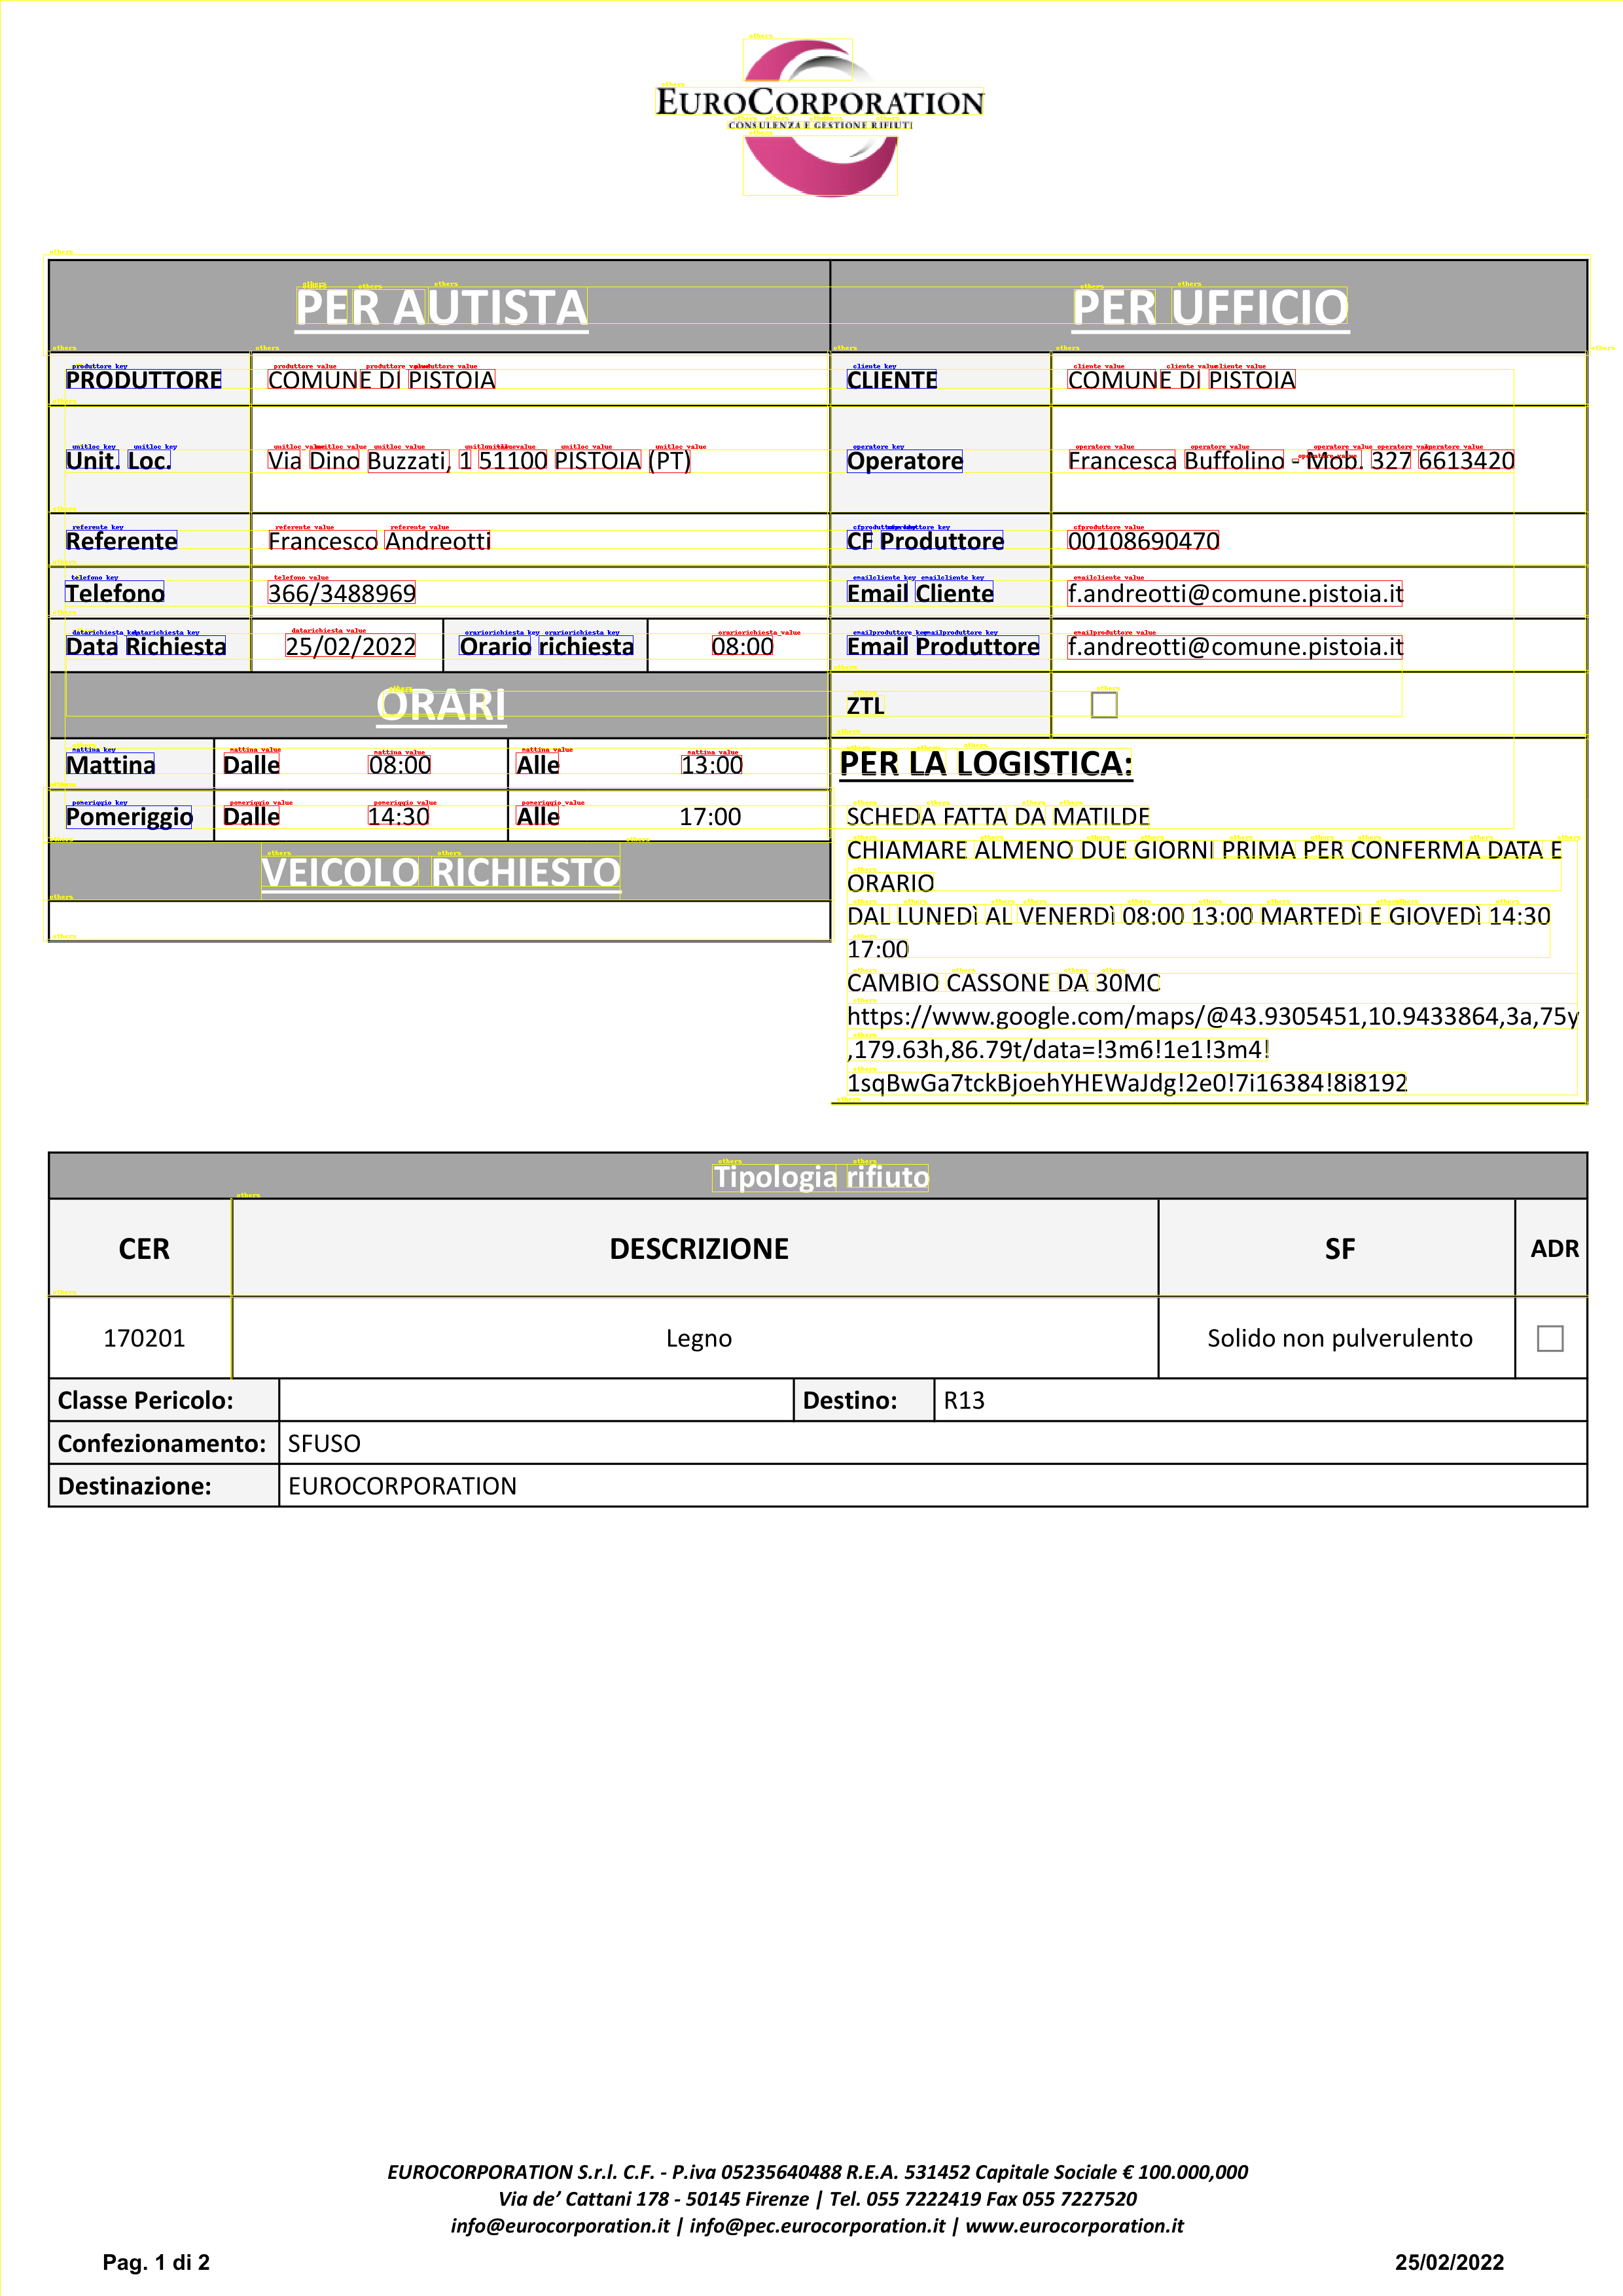

In [42]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label


label2color = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }





# label2color = {
#     "others": 'yellow',
#     "key": 'blue',
#     "value": 'red',
#   }

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    # print(predicted_label)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

In [43]:
# pr=[]
# for i,j in zip(predictions, words):
#   if id2label[i] =="produttore_key":
#     pr.append(j)
#   # print(i, j, ": " ,id2label[i])

# " ".join(pr)

## Ground Truth Value

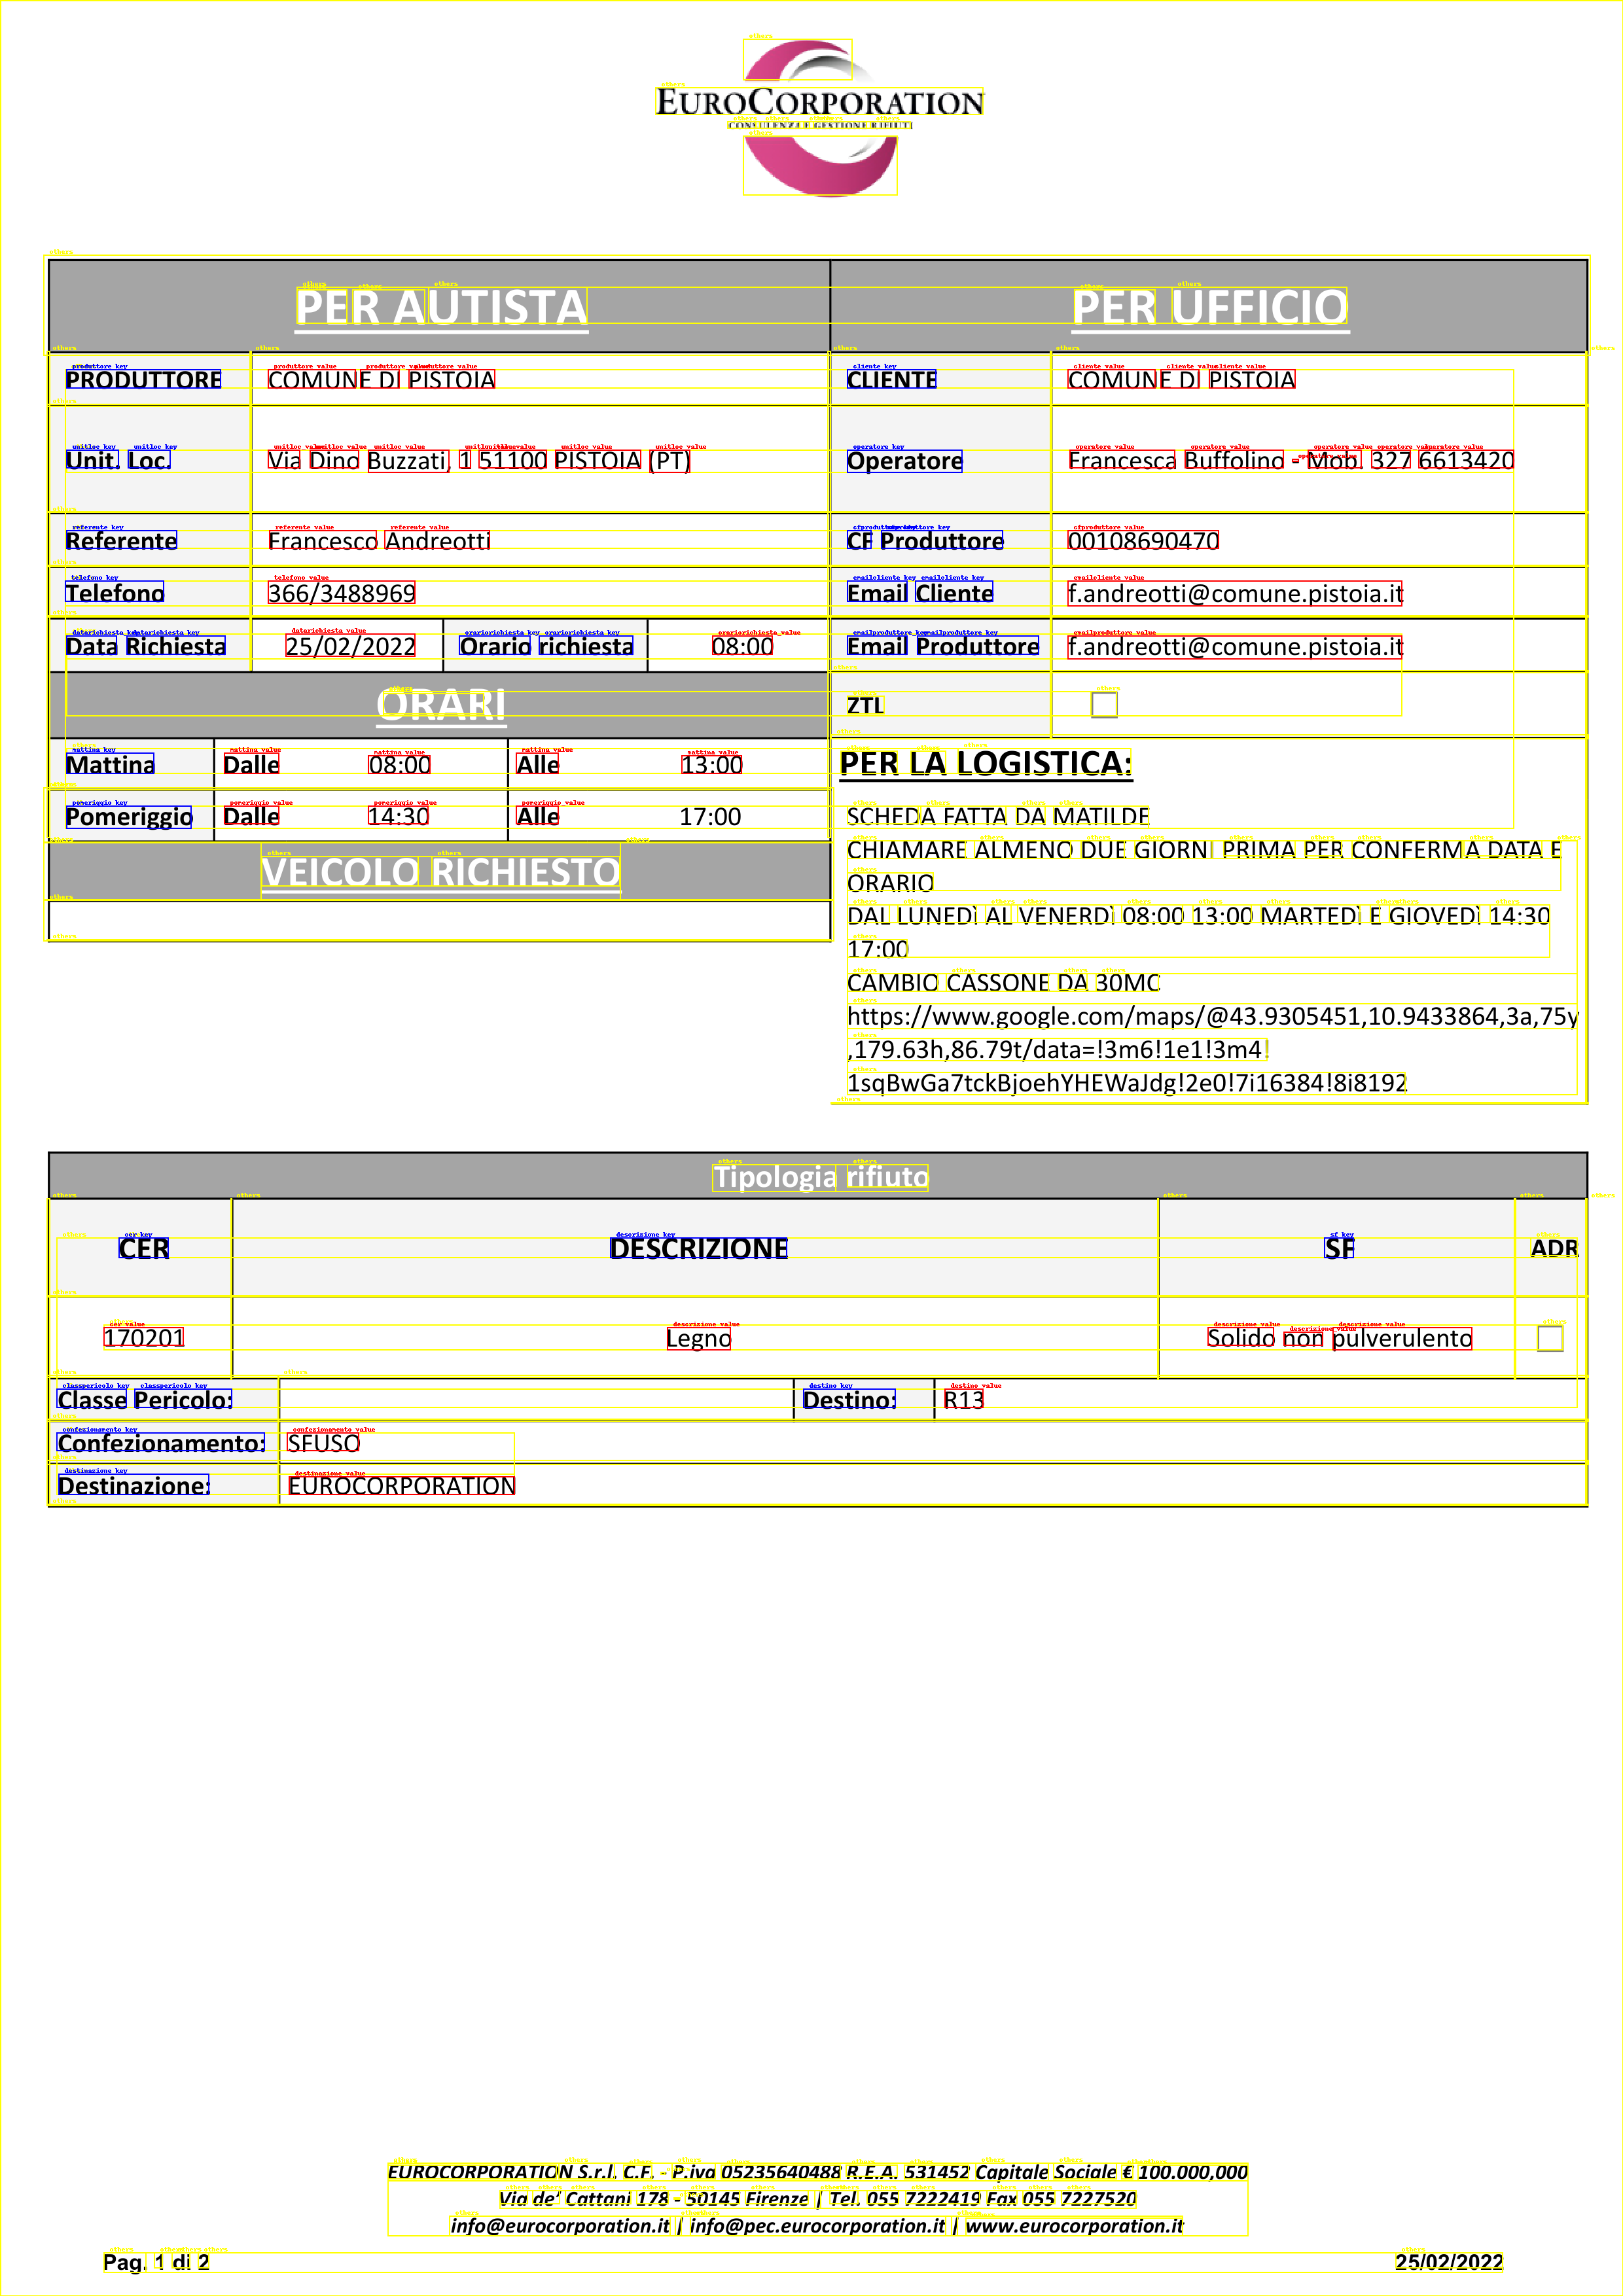

In [44]:
image = Image.open(example["image_path"]).convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image

### Inference

In [45]:
# !tesseract — version

In [ ]:
import os
os.system('pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu')

import os
import PIL
import torch
import pandas as pd
import numpy as np
import gradio as gr
from tqdm import tqdm
from difflib import SequenceMatcher
from itertools import groupby
from datasets import load_metric
from datasets import load_dataset
from datasets.features import ClassLabel
from transformers import AutoProcessor
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoModelForTokenClassification
from transformers.data.data_collator import default_data_collator
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
from transformers import LayoutLMv3ForTokenClassification,LayoutLMv3FeatureExtractor

# define id2label
id2label={0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'cliente_key', 4: 'cliente_value', 5: 'unitloc_key', 6: 'unitloc_value', 7: 'operatore_key', 8: 'operatore_value', 9: 'referente_key', 10: 'referente_value', 11: 'cfproduttore_key', 12: 'cfproduttore_value', 13: 'telefono_key', 14: 'telefono_value', 15: 'emailcliente_key', 16: 'emailcliente_value', 17: 'datarichiesta_key', 18: 'datarichiesta_value', 19: 'orariorichiesta_key', 20: 'orariorichiesta_value', 21: 'emailproduttore_key', 22: 'emailproduttore_value', 23: 'mattina_key', 24: 'mattina_value', 25: 'pomeriggio_key', 26: 'pomeriggio_value', 27: 'cer_key', 28: 'cer_value', 29: 'descrizione_key', 30: 'descrizione_value', 31: 'sf_key', 32: 'sf_value', 33: 'classpericolo_key', 34: 'classpericolo_value', 35: 'destino_key', 36: 'destino_value', 37: 'confezionamento_key', 38: 'confezionamento_value', 39: 'destinazione_key', 40: 'destinazione_value'}

label_ints = np.random.randint(0,len(PIL.ImageColor.colormap.items()),42)
label_color_pil = [k for k,_ in PIL.ImageColor.colormap.items()]
label_color = [label_color_pil[i] for i in label_ints]
label2color = {}
for k,v in id2label.items():
  if v[:2] == '':
    label2color['o']=label_color[k]
  else:
    label2color[v[2:]]=label_color[k]

processor = AutoProcessor.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000", apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000")


def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


def iob_to_label(label):
    return label


def process_image(image):
    width, height = image.size

    feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr=True)
    encoding_feature_extractor = feature_extractor(image, return_tensors="pt")
    words, boxes = encoding_feature_extractor.words, encoding_feature_extractor.boxes

    custom_config = r'--oem 3 --psm 6'
    # encode
    encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
    offset_mapping = encoding.pop('offset_mapping')

    # forward pass
    outputs = model(**encoding)

    # get predictions
    predictions = outputs.logits.argmax(-1).squeeze().tolist()
    token_boxes = encoding.bbox.squeeze().tolist()

    # only keep non-subword predictions
    is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
    true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

    true_boxes = true_boxes[1:-1]
    true_predictions = true_predictions[1:-1]

    preds = []
    l_words = []
    bboxes = []

    for i,j in enumerate(true_predictions):

      if j != 'O':
        preds.append(true_predictions[i])
        l_words.append(words[0][i])
        bboxes.append(true_boxes[i])

    return bboxes, preds, l_words, image



def visualize_image(final_bbox, final_preds, l_words, image):

      draw = ImageDraw.Draw(image)
      font = ImageFont.load_default()

      label2color = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }

      l2l = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }
      f_labels = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "cliente_key": 'blue',
    "cliente_value": 'red',
    "operatore_key": 'blue',
    "operatore_value": 'red',
    "referente_key": 'blue',
    "referente_value": 'red',
    "telefono_key": 'blue',
    "telefono_value": 'red',
    "cfproduttore_key": 'blue',
    "cfproduttore_value": 'red',
    "emailcliente_key": 'blue',
    "emailcliente_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "emailproduttore_key": 'blue',
    "emailproduttore_value": 'red',
    "mattina_key": 'blue',
    "mattina_value": 'red',
    "pomeriggio_key": 'blue',
    "pomeriggio_value": 'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }

      json_df = []

      for ix, (prediction, box) in enumerate(zip(final_preds, final_bbox)):
        predicted_label = iob_to_label(prediction).lower()
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)

        json_dict = {}
        json_dict['TEXT'] = l_words[ix]
        json_dict['LABEL'] = f_labels[predicted_label]
        
        json_df.append(json_dict)
      # print('json_df',json_df)
      return image, json_df


def process_form(preds, words):
  #track the similar labels together and store indices in tracker_label_idx
  tracker_label_idx = {}
  for i in range(len(preds)):
    if preds[i] == 'others':
      pass
    elif preds[i] in tracker_label_idx:
      tracker_label_idx[preds[i]].append(i)
    else:
      tracker_label_idx[preds[i]] = [i]
  
  #update the indices with values from words
  tracker_label = {}
  for i in tracker_label_idx:
    w = ''
    for index in tracker_label_idx[i]:
      w = w +' '+ words[index]
    tracker_label[i] = w
  
  # store the unique labels for key and val
  uniq_labels =list(tracker_label.keys())
  key_ = []
  val_ = []
  for i in uniq_labels:
    if 'key' in i:
      key_.append(i)
    elif 'value' in i:
      val_.append(i)
  
  #sorting the keys and values obtained 
  key_.sort()
  val_.sort()
  # using SequenceMatcher to compare the textual key and values
  from difflib import SequenceMatcher
  def similar(a, b):
      return SequenceMatcher(None, a, b).ratio()
  pairs = {}
  for k in key_:
      pairs[k]= []
      for v in val_:
        if similar(k[:-4],v[:-6])>0.98: #here 0.7 acts as threshold for matching the strings
          pairs[k].append(v)
          break # we break as soon as match is found to reduce complexity; and since elements are sorted we are confident about the append
          
  #using pairs_ to save the key and values in form of dictonary
  pairs_ = {}
  for i in pairs:
    v = pairs.get(i)
    if len(v)!= 0:
      pairs_[tracker_label.get(i)]=[tracker_label.get(v[0])]
    else:
      pairs_[tracker_label.get(i)] = []
  
  # conversion of dict pairs_ into dataframe
  import pandas as pd
  return pd.DataFrame(pairs_.items(), columns = ['keys' ,'values'])
  
def completepreprocess(image):
  # gets the bounding boxes, predictions, extracted words and image processed
  image = image.convert("RGB")
  bbox, preds, words, image = process_image(image)

  # returns image and extracted key-value pairs along with title as the output
  im, df = visualize_image(bbox, preds, words, image)

  # process and returns k-v pairs by concatenating relevant strings.
  df_main = process_form(preds, words)

  return im,df_main

title = "Eurocorporation information extraction using LayoutLMv3 model"
description = "Eurocorporation information extraction - We use Microsoft's LayoutLMv3 trained on Eurocorp Dataset to predict the produttore_key, produttore_value, unitloc_key, unitloc_value, cliente_key, cliente_value, operatore_key, operatore_value, referente_key, referente_value, telefono_key, telefono_value, cfproduttore_key, cfproduttore_value, emailcliente_key, emailcliente_value, datarichiesta_key, datarichiesta_value, orariorichiesta_key, orariorichiesta_value,emailproduttore_key,emailproduttore_value,mattina_key,mattina_value,pomeriggio_key,pomeriggio_value,cer_key,cer_value,descrizione_key,descrizione_value,sf_key,sf_value,classpericolo_key,destino_key,destino_value,confezionamento_key,confezionamento_value,destinazione_key and destinazione_value. Results will show up in a few seconds."

article="<b>References</b><br>[1] Y. Xu et al., “LayoutLMv3: Pre-training for Document AI with Unified Text and Image Masking.” 2022. <a href='https://arxiv.org/abs/2204.08387'>Paper Link</a><br>[2]  <a href='https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLMv3'>LayoutLMv3 training and inference</a><br>[3] Hongbin Sun, Zhanghui Kuang, Xiaoyu Yue, Chenhao Lin, and Wayne Zhang. 2021. Spatial Dual-Modality Graph Reasoning for Key Information Extraction. arXiv. DOI:https://doi.org/10.48550/ARXIV.2103.14470  <a href='https://doi.org/10.48550/ARXIV.2103.14470'>Paper Link</a>" 
css = """.output_image, .input_image {height: 600px !important}"""


iface = gr.Interface(fn=completepreprocess, 
                     inputs=gr.inputs.Image(type="pil",optional=True,label="upload file"), 
                    #  inputs=gr.inputs.File(file_count="multiple", label="upload file"),
                     outputs=[gr.outputs.Image(type="pil", label="annotated image"),"dataframe"] , 
                    #  outputs=,            
                     title=title,
                     description=description,
                     css=css,
                     article=article,
                     analytics_enabled = True, enable_queue=True)

iface.launch(inline=False, share=True, debug=True)


loading feature extractor configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/preprocessor_config.json
loading feature extractor configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/preprocessor_config.json
Feature extractor LayoutLMv3FeatureExtractor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "LayoutLMv3FeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": null,
  "processor_class": "LayoutLMv3Processor",
  "resample": 2,
  "size": 224
}

Didn't find file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/added_tokens.json. We won't load it.
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/vocab.json
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/merges.txt
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/tokenizer.json
loading file None
loading fi

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://14814.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is de